In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [13]:
df=pd.read_csv("C:/Users/PC/Desktop/LAB-Linear regerssion/invest.txt",sep=' ')
df

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50
5,1973,1326.4,229.8,105.75,6.44
6,1974,1434.2,228.7,115.08,7.83
7,1975,1549.2,206.1,125.79,6.25
8,1976,1718.0,257.9,132.34,5.50
9,1977,1918.3,324.1,140.05,5.46


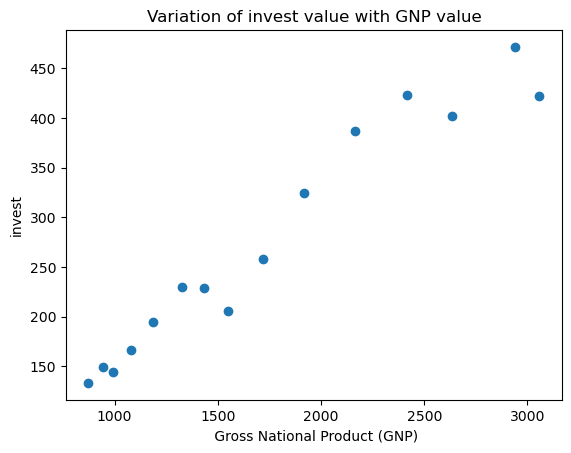

In [62]:
plt.scatter(x=df['gnp'],y=df['invest'])
plt.title("Variation of invest value with GNP value")
plt.xlabel(" Gross National Product (GNP)")
plt.ylabel("invest")
plt.show()

In [16]:
## transform the 2 columns via logarithm
df['log_gnp']=np.log(df["gnp"])
df['log_invest']=np.log(df["invest"])
df

,year,gnp,invest,cpi,interest,log_gnp,log_invest
0,1968,873.4,133.3,82.54,5.16,6.772394,4.892602
1,1969,944.0,149.3,86.79,5.87,6.850126,5.005958
2,1970,992.7,144.2,91.45,5.95,6.900429,4.971201
3,1971,1077.6,166.4,96.01,4.88,6.982492,5.114395
4,1972,1185.9,195.0,100.00,4.50,7.078257,5.273000
5,1973,1326.4,229.8,105.75,6.44,7.190224,5.437209
6,1974,1434.2,228.7,115.08,7.83,7.268362,5.432411
7,1975,1549.2,206.1,125.79,6.25,7.345494,5.328361
8,1976,1718.0,257.9,132.34,5.50,7.448916,5.552572
9,1977,1918.3,324.1,140.05,5.46,7.559195,5.781052


### Creating a Linear regression model from scratch  

### **Ordinary Least Squares (OLS) Estimation for Simple Linear Regression**

#### **1. Linear Regression Model**
We assume a simple linear regression model of the form:

$$
Y_i = \beta_0 + \beta_1 x_i + \epsilon_i, \quad \epsilon_i \sim \mathcal{N}(0, \sigma^2), \quad i = 1, \dots, n
$$

where:
- \( Y_i \) is the dependent variable (**Investment**),
- \( x_i \) is the independent variable (**Gross National Product, GNP**),
- \( \beta_0 \) is the **intercept** (regression constant),
- \( \beta_1 \) is the **slope** (regression coefficient),
- \( \epsilon_i \) represents the errors, assumed to be independent and normally distributed.

---

##### **2. Estimation of Coefficients**
The **Ordinary Least Squares (OLS)** estimates minimize the **Sum of Squared Errors (SSE)**:

$$
SSE = \sum_{i=1}^{n} (Y_i - \beta_0 - \beta_1 x_i)^2
$$

Taking the derivatives and solving for \( \beta_0 \) and \( \beta_1 \), we obtain:

$$
\hat{\beta}_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x}) (Y_i - \bar{Y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}
$$

$$
\hat{\beta}_0 = \bar{Y} - \hat{\beta}_1 \bar{x}
$$

where:
- \( \bar{Y} \) is the **mean of** \( Y \):

  $$
  \bar{Y} = \frac{1}{n} \sum_{i=1}^{n} Y_i
  $$

- \( \bar{x} \) is the **mean of** \( x \):

  $$
  \bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
  $$

---

#### **3. Estimation of Variance**
The estimated variance of residuals is:

$$
\hat{\sigma}^2 = \frac{1}{n - 2} \sum_{i=1}^{n} (Y_i - (\hat{\beta}_0 + \hat{\beta}_1 x_i))^2
$$

The **standard errors** of the OLS estimators are:

$$
\text{Std}(\hat{\beta}_1) = \sqrt{\frac{\hat{\sigma}^2}{\sum_{i=1}^{n} (x_i - \bar{x})^2}}
$$

$$
\text{Std}(\hat{\beta}_0) = \sqrt{\hat{\sigma}^2 \left( \frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^{n} (x_i - \bar{x})^2} \right)}
$$

---

###### **4. Coefficient of Determination (\( R^2 \))**
The **coefficient of determination**, \( R^2 \), measures how well the regression model explains the variability in \( Y \):

$$
R^2 = 1 - \frac{SS_{\text{residual}}}{SS_{\text{total}}}
$$

where:
- The **Total Sum of Squares** is:

  $$
  SS_{\text{total}} = \sum_{i=1}^{n} (Y_i - \bar{Y})^2
  $$

- The **Residual Sum of Squares** is:

  $$
  SS_{\text{residual}} = \sum_{i=1}^{n} (Y_i - (\hat{\beta}_0 + \hat{\beta}_1 x_i))^2
  $$

---

#### **5. Interpretation**
- If \( \hat{\beta}_1 > 0 \), it means that \( Y \) **increases** as \( x \) **increases**.
- If \( \hat{\beta}_1 < 0 \), it means that \( Y \) **decreases** as \( x \) **increases**.
- If \( R^2 \approx 1 \), the model **explains most of the variance** in \( Y \).
- If \( R^2 \approx 0 \), the model **does not explain the variance** in \( Y \).

This provides the theoretical foundation for estimating and evaluating a simple linear regression model using **Ordinary Least Squares (OLS)**.


Intercept (b0): -1.9636, Slope (b1): 1.0153
Least Squared Error (SSE): 0.0998


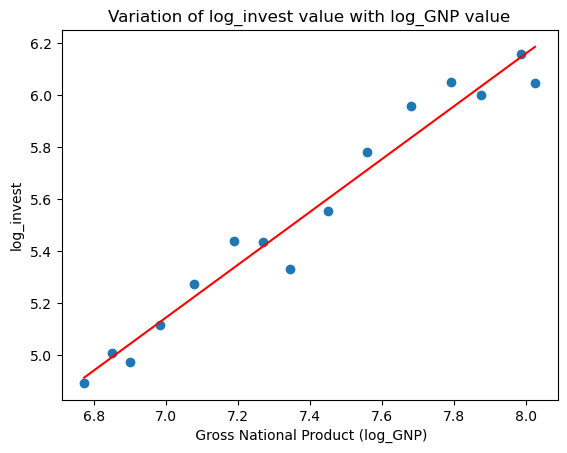

In [71]:
x = df['log_gnp'].values
y = df['log_invest'].values

# Compute means
x_mean = np.mean(x)
y_mean = np.mean(y)

# Compute b1 (slope)
b1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)
# Compute b0 (intercept)
beta_0 = y_mean - b1 * x_mean
print(f"Intercept (b0): {b0:.4f}, Slope (b1): {b1:.4f}")


# Compute predictions
y_pred = beta_0 + b1 * x

# Compute Least Squared Error (SSE)
sse = np.sum((y - y_pred) ** 2)
print(f"Least Squared Error (SSE): {sse:.4f}")

# plot the fit line
plt.scatter(x=df['log_gnp'],y=df['log_invest'])
plt.plot(x,y_pred,color="red",label='regression line')
plt.title("Variation of log_invest value with log_GNP value")
plt.xlabel(" Gross National Product (log_GNP)")
plt.ylabel("log_invest")
plt.show()

In [ ]:
## Evaluating the model 
# Coefficient of Determination 

# MSE


### using a more general form : OLS closed form solution:


Intercept (b0): -1.9636, Slope (b1): 1.0153
Least Squared Error (SSE): 0.0998


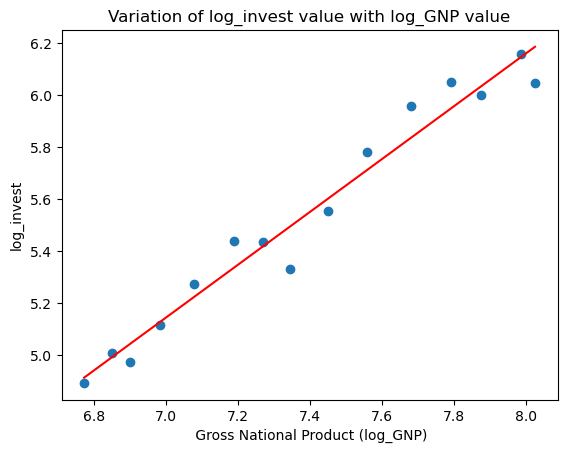

In [70]:
X = np.column_stack((np.ones(df.shape[0]), df['log_gnp']))
y = df['log_invest'].values

# Compute OLS estimates using closed-form solution: θ = (X^T X)^(-1) X^T y
theta = np.linalg.inv(X.T @ X) @ (X.T @ y)

# Extract intercept and slope
b0, b1 = theta
print(f"Intercept (b0): {b0:.4f}, Slope (b1): {b1:.4f}")

# compute predictions 
y_pred = b0+b1*x

# Compute Least Squared Error (SSE)
sse = np.sum((y - y_pred) ** 2)
print(f"Least Squared Error (SSE): {sse:.4f}")

# plot the fit line
plt.scatter(x=df['log_gnp'],y=df['log_invest'])
plt.plot(x,y_pred,color="red",label='regression line')
plt.title("Variation of log_invest value with log_GNP value")
plt.xlabel(" Gross National Product (log_GNP)")
plt.ylabel("log_invest")
plt.show()

### Comparing the model to sckit-learn

In [ ]:
## Comparing the results with sckit learn values
from sklearn.linear_model import LinearRegression
x=df['log_gnp']
y=df["log_invest"]



Intercept (β̂0): -1.7270, Slope (β̂1): 0.9815
Train Set -> MSE: 0.0067, RMSE: 0.0817, R²: 0.9587
Test  Set -> MSE: 0.0083, RMSE: 0.0910, R²: 0.9660


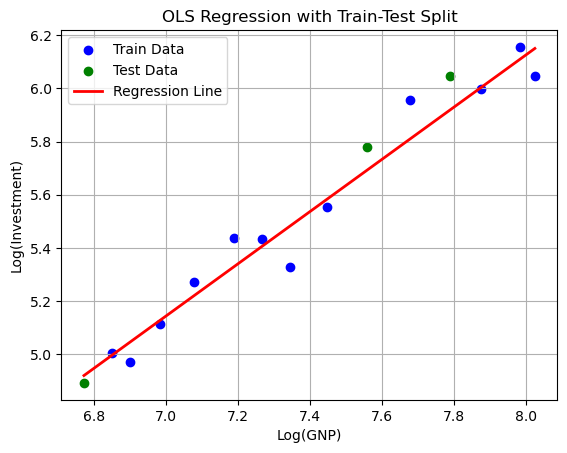

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load dataset and apply log transformation
df = pd.read_csv("invest.txt", delim_whitespace=True)
df['log_gnp'], df['log_invest'] = np.log(df['gnp']), np.log(df['invest'])

# Prepare features (X) and target variable (y)
X = df[['log_gnp']].values  # Reshape as 2D array
y = df['log_invest'].values

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Extract intercept and slope
b0, b1 = model.intercept_, model.coef_[0]
print(f"Intercept (β̂0): {b0:.4f}, Slope (β̂1): {b1:.4f}")

# Make predictions on both train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Compute performance metrics
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print(f"Train Set -> MSE: {mse_train:.4f}, RMSE: {rmse_train:.4f}, R²: {r2_train:.4f}")
print(f"Test  Set -> MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, R²: {r2_test:.4f}")

# Plot observed data and regression line
plt.scatter(X_train, y_train, color="blue", label="Train Data")
plt.scatter(X_test, y_test, color="green", label="Test Data")
plt.plot(df['log_gnp'], model.predict(df[['log_gnp']].values), color="red", linewidth=2, label="Regression Line")
plt.xlabel("Log(GNP)"), plt.ylabel("Log(Investment)"), plt.title("OLS Regression with Train-Test Split")
plt.legend(), plt.grid(True)
plt.show()


In [ ]:
## Evaluating the model 
# Coefficient of Determination 

# MSE